In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_12_03'
exp_names = [
    '2017_12_03_13_00_51_op-readout-iy-scan',
    '2017_12_03_13_25_24_op-readout-iy-scan-nssro'
]

cuts = [[31],[2]]

q = qdp.QDP(base_data_path=dp)
for exp_name in exp_names:
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
    q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined
name 'fort_exp' is not defined


In [3]:
print(q.experiments[0]['variable_list'])
try:
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
except IndexError:
    xlab = 'iterator'

[u'Iy_read_mz']


In [4]:
retention = q.apply_thresholds()

error reading (e,i): (1,8)


In [5]:
tbl_str = "ivar:\t{0:.3f}\tloading:{1:.3f}\tretention:{2:.3f} +- {3:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['loading'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.000	loading:0.125	retention:0.770 +- 0.035
ivar:	0.010	loading:0.086	retention:0.490 +- 0.042
ivar:	0.020	loading:0.070	retention:0.390 +- 0.041
ivar:	0.030	loading:0.070	retention:0.455 +- 0.042
ivar:	0.040	loading:0.077	retention:0.370 +- 0.041
ivar:	0.050	loading:0.101	retention:0.280 +- 0.038
ivar:	0.060	loading:0.083	retention:0.290 +- 0.038
ivar:	0.070	loading:0.069	retention:0.320 +- 0.039
ivar:	0.000	loading:0.113	retention:0.640 +- 0.040
ivar:	0.010	loading:0.100	retention:0.480 +- 0.042
ivar:	0.020	loading:0.069	retention:0.400 +- 0.041
ivar:	0.030	loading:0.104	retention:0.475 +- 0.042
ivar:	0.040	loading:0.079	retention:0.480 +- 0.042
ivar:	0.050	loading:0.072	retention:0.430 +- 0.042
ivar:	0.060	loading:0.070	retention:0.380 +- 0.041
ivar:	0.070	loading:0.083	retention:0.350 +- 0.040


In [6]:
q.save_experiment_data(filename_prefix='ssro_nssro_comp')

error reading (e,i): (1,8)


<IPython.core.display.Javascript object>


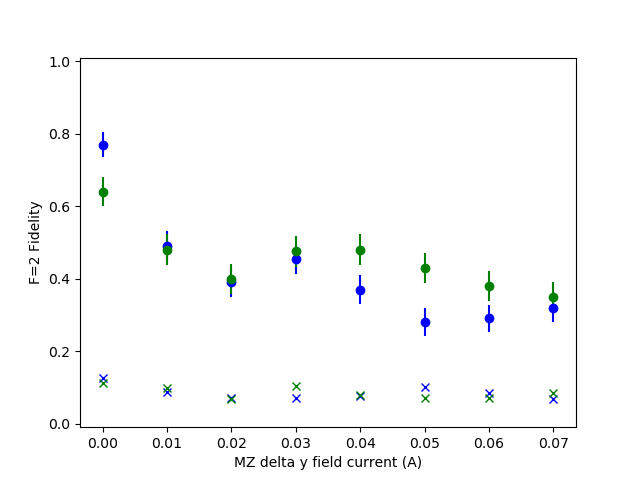

In [7]:
fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = colors[e]+'o'
    )
    ax.plot(retention['ivar'][e], retention['loading'][e], colors[e]+'x')
ax.set_ylim(-0.01, 1.01)
ax.set_xlabel(xlab)
ax.set_ylabel('F=2 Fidelity')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'op_time_scan_f12_fidelities.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [14]:
def gaussian(x, a, x0, s, b):
    return b + a*np.exp(-0.5*((x-x0)/s)**2)

<IPython.core.display.Javascript object>


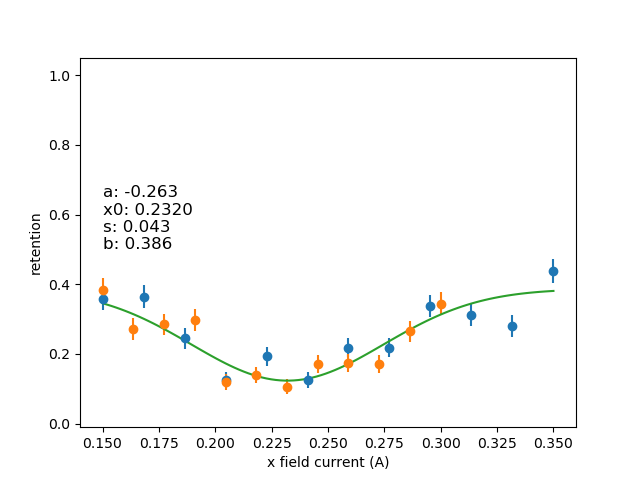

In [19]:
fig, ax = plt.subplots()
xdat = []
ydat = []
edat = []
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
    xdat += retention['ivar'][e].tolist()
    ydat += retention['retention'][e].tolist()
    edat += retention['error'][e].tolist()
ax.set_ylim(-0.01, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

guess = [-0.2, 0.23, 0.1, 0.4]
popt, pcov = optimize.curve_fit(
    gaussian,
    xdat,
    ydat,
    p0=guess,
    sigma=edat
)
xs = np.linspace(min(xdat),max(xdat),100)
ax.plot(xs, gaussian(xs, *popt))

fit_data = "a: {:.3f}\nx0: {:.4f}\ns: {:.3f}\nb: {:.3f}"
ax.text(0.15, 0.5, fit_data.format(*popt), fontsize=12)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'ix_op_uwave_pi.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [13]:
xdat

[0.15,
 0.16818181818181818,
 0.18636363636363634,
 0.20454545454545453,
 0.22272727272727272,
 0.2409090909090909,
 0.2590909090909091,
 0.2772727272727272,
 0.2954545454545454,
 0.3136363636363636,
 0.3318181818181818,
 0.35,
 0.15,
 0.16363636363636364,
 0.17727272727272728,
 0.19090909090909092,
 0.20454545454545453,
 0.21818181818181817,
 0.2318181818181818,
 0.24545454545454543,
 0.2590909090909091,
 0.2727272727272727,
 0.2863636363636364,
 0.3]